<a href="https://colab.research.google.com/github/musiclip/practice_python/blob/main/20230824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##실수자료로의 전환(Vectorization)

머신러닝이란: Machine learning is about creating models from data

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
type(iris)

pandas.core.frame.DataFrame

x : 데이터, 독립변수, 설명변수(특성변수,feature)

y : 모델 결과 값, 종속변수, 목적변수

x,y값 다 제공 -> w, b

w_적절, b_적절 ==> 새로운 x -> 새로운 y 산출

y = x + 1

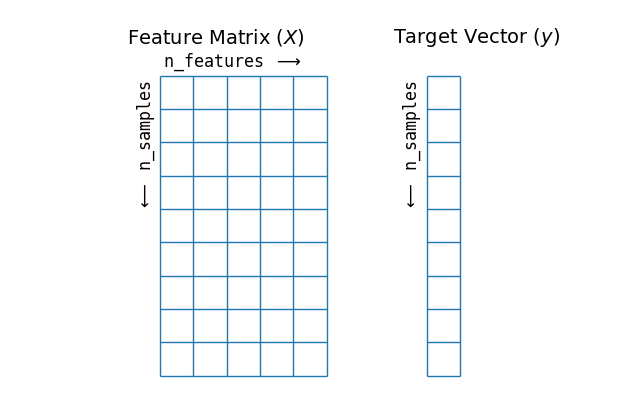

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2)

fig.savefig('05.02-samples-features.png')

Vectorization : 범주형 자료, 텍스트, 이미지 등을 실수로 되어있는 [n_samples, n_features]의 형태로 전환, 새로운 특성변수 생성, 결측자료의 대체

Categorical data = category + categorical codes(<python for data analysis Wes McKinney>)

category : 구별되는 값을 담고 있다.

categorical code : 구별된 것들의 수량을 표시한 값

In [5]:
fruits = ['apple','orange','apple','apple'] * 2

In [6]:
fruits

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(fruits)

In [9]:
df

,0
0,apple
1,orange
2,apple
3,apple
4,apple
5,orange
6,apple
7,apple


In [10]:
cat_ddf = df[0].astype('category')

In [11]:
cat_ddf

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: 0, dtype: category
Categories (2, object): ['apple', 'orange']

In [12]:
cat_ddf.cat.codes

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int8

In [13]:
cat_ddf.cat.categories

Index(['apple', 'orange'], dtype='object')

In [14]:
x = [{'city':'seoul','temp':10.0},{'city':'Dubai','temp':33.5},
     {'city':'LA','temp':20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [15]:
from sklearn.feature_extraction import DictVectorizer

In [16]:
vec = DictVectorizer(sparse = False) #인스턴스 오브젝트 = 클래스(sparse = False)

In [17]:
vec.fit_transform(x)

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [18]:
vec

DictVectorizer(sparse=False)

In [19]:
vec_sparse_true = DictVectorizer(sparse = True)

In [20]:
vec_sparse_true

DictVectorizer()

In [21]:
x_sparse = vec_sparse_true.fit_transform(x)

In [22]:
x_sparse

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
print(x_sparse)

  (0, 2)	1.0
  (0, 3)	10.0
  (1, 0)	1.0
  (1, 3)	33.5
  (2, 1)	1.0
  (2, 3)	20.0


In [24]:
x_sparse.toarray()

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [26]:
D = [{'foo': 1, 'bar':2},{'foo':3,'baz':1}]

In [27]:
vec.fit_transform(D)

array([[2., 0., 1.],
       [0., 1., 3.]])

In [28]:
D = [{'foo': 1, 'bar':2},{'foo':3,'baz':1}]
vec = DictVectorizer(sparse = False)
vec.fit_transform(D)
vec_sparse_true = DictVectorizer(sparse = True)
D_sparse = vec_sparse_true.fit_transform(D)
D_sparse.toarray()

array([[2., 0., 1.],
       [0., 1., 3.]])

In [29]:
D = [{'foo': 1, 'bar':2},{'foo':3,'baz':1}]
v = DictVectorizer(sparse = False)
x = v.fit_transform(D)
x

array([[2., 0., 1.],
       [0., 1., 3.]])

In [31]:
v.get_feature_names_out()

array(['bar', 'baz', 'foo'], dtype=object)

In [43]:
v = DictVectorizer()   #어떤 데이터가 들어올건지 모르지만 초기설정

In [42]:
x = v.fit_transform(D)   #데이터를 피팅해줘라

In [35]:
x

<2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [36]:
print(x)

  (0, 0)	2.0
  (0, 2)	1.0
  (1, 1)	1.0
  (1, 2)	3.0


In [40]:
v.feature_names_   #.은 method _는 attribute

['bar', 'baz', 'foo']

In [44]:
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']

In [45]:
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
vec2 = CountVectorizer()

In [48]:
tex = vec2.fit_transform(text)

In [49]:
tex

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [55]:
vec2.get_feature_names_out()

array(['날아라', '내가', '높이', '떴다', '만든', '멀리', '비행기', '우리'], dtype=object)

In [60]:
df = pd.DataFrame(tex.toarray(), columns = vec2.get_feature_names_out()) #array형태

In [59]:
df

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


is, the, a, an 과 같은 중요하지 않은 단어들

### TFIDF(Term Frequency Inverse Document Frequency): 전체 문서에서 출현 비중이 높은 단어에 낮은 가중치를 주고, 반대로 출현 비중이 낮은 단어에는 상대적으로 높은 가중치를 부여하는 방법

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf = TfidfVectorizer()

In [63]:
x2 = tfidf.fit_transform(text)

In [64]:
x2

<4x8 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [66]:
df = pd.DataFrame(x2.toarray(), columns = tfidf.get_feature_names_out())

In [67]:
df

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


2. 특성변수의 생성

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
x = np.array([1,2,3,4,5])
y = np.array([5,3,1,4,8])

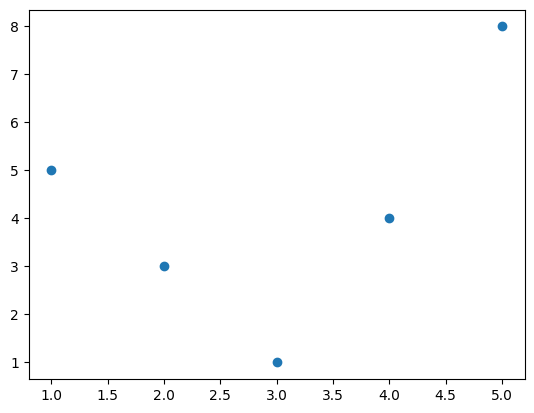

In [74]:
plt.plot(x, y, 'o')

선형의 조건

f(x1+x2) = f(x1) + f(x2)

f(kx) = kf(x)

두 조건을 만족하면 선형

In [75]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias = True)

In [76]:
x1 = poly.fit_transform(x[:, np.newaxis])

In [77]:
x1

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [78]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [80]:
x

array([1, 2, 3, 4, 5])

In [79]:
x[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [83]:
x.reshape(-1,1) # == x[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5]])

정규화

표준화 : 어떤 특성의 값들이 정규분포, 즉 종모양의 분포를 따른다고 가정하고 값들을 0의 평균, 1의 표준편차를 갖도록 변환해주는 것입니다. 표준화를 해주면 정규화처럼 특성값의 범위가 0과 1의 범위로 균일하게 바뀌지는 않습니다

3. 결측자료의 대체

 - 결측치가 있을때, scikit-learn은 작동하지 않으므로 결측치 문제를 해결해야한다.

 - pandas를 이용할 경우, dropna(),fillna()등을 사용하여 채워넣기

 - 혹은, 특성변수의 평균, 중위수, 최빈수로 결측치를 대체.

#판다스의 계층 색인

In [87]:
data = pd.Series(np.random.randn(9),index = [['a','a','a','b',
                                              'b','c','c',
                                              'd','d'],[1,2,3,1,3,1,2,2,3]])

In [88]:
data

a  1   -1.206665
   2    1.281337
   3    0.293416
b  1    2.591486
   3    0.003247
c  1    1.484597
   2    0.464512
d  2   -0.491629
   3    0.597923
dtype: float64

In [89]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [91]:
data['b']

1    2.591486
3    0.003247
dtype: float64

In [92]:
data['b':'c']

b  1    2.591486
   3    0.003247
c  1    1.484597
   2    0.464512
dtype: float64

In [93]:
data.loc[['b','c']]

b  1    2.591486
   3    0.003247
c  1    1.484597
   2    0.464512
dtype: float64

In [94]:
data.loc[:,2]

a    1.281337
c    0.464512
d   -0.491629
dtype: float64

In [95]:
data

a  1   -1.206665
   2    1.281337
   3    0.293416
b  1    2.591486
   3    0.003247
c  1    1.484597
   2    0.464512
d  2   -0.491629
   3    0.597923
dtype: float64

In [99]:
data.unstack()

,1,2,3
a,-1.206665,1.281337,0.293416
b,2.591486,NaN,0.003247
c,1.484597,0.464512,NaN
d,NaN,-0.491629,0.597923


In [100]:
data.unstack().stack()

a  1   -1.206665
   2    1.281337
   3    0.293416
b  1    2.591486
   3    0.003247
c  1    1.484597
   2    0.464512
d  2   -0.491629
   3    0.597923
dtype: float64

In [102]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])

In [103]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [104]:
frame.index.names = ['key1','key2']

In [105]:
frame.columns.names = ['state','color']

In [106]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [111]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [114]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [115]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [117]:
frame.sort_index(level = 1)    #key1은 level= 0

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [118]:
frame.swaplevel(0,1)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [119]:
frame.swaplevel(0,1).sort_index(level = 0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [120]:
frame.sum(level = 'key2')

<ipython-input-120-292f1548378b>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level = 'key2')


state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [121]:
frame.sum(level = 'color', axis = 1)

<ipython-input-121-2eb2cefe6107>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level = 'color', axis = 1)


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [122]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [124]:
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'],
                    'datal':range(7)})

In [125]:
df1

,key,datal
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [126]:
df2 = pd.DataFrame({'key':['a','b','d'],
                    'data2':range(3)})

In [127]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [129]:
pd.merge(df1, df2)  #data2에 값이 없는것이 아니라 개수 맞춰서 채워준것

,key,datal,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [132]:
pd.merge(df1, df2, on = 'key')  #겹치는것들만 병합, on = 'key'는 병합이 되는 기준 설정

,key,datal,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [133]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})

In [134]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [135]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [137]:
pd.merge(df3, df4, left_on ='lkey',right_on = 'rkey' ) #없는 c와 d는 제외하고 병합

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [139]:
pd.merge(df1, df2, how = 'outer')  #outer : 합집합

,key,datal,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [141]:
pd.merge(df1, df2, how = 'inner')  #inner : 교집합(기본값)

,key,datal,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [142]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})

In [143]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [144]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [146]:
pd.merge(df1, df2, on = 'key', how = 'left')  #df1의 원소 하나당 df1과 같은 key값을 갖고있는 df2의 원소

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [147]:
pd.merge(df1, df2, how = 'inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [148]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})

In [149]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [150]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [152]:
pd.merge(left, right, on = ['key1','key2'],how = 'outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [153]:
pd.merge(left, right, on = 'key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [155]:
pd.merge(left, right, on = 'key1',suffixes = ('_left','_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [156]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [169]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [166]:
right1

,group_val
a,3.5
b,7.0


In [159]:
pd.merge(left1, right1, left_on = 'key',right_index = True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [160]:
pd.merge(left1, right1, left_on = 'key',right_index = True, how = 'outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [170]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [171]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [172]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [174]:
pd.merge(lefth, righth, left_on = ['key1','key2'], right_index = True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [175]:
pd.merge(lefth, righth, left_on = ['key1','key2'], right_index = True,how = 'outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [176]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])

In [177]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [178]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [180]:
left2.join(right2, how = 'outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


# 축 따라 이어 붙이기

In [183]:
arr = np.arange(12).reshape((3,4))

In [185]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [184]:
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [186]:
np.concatenate([arr, arr], axis = 0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [187]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [188]:
s1

a    0
b    1
dtype: int64

In [189]:
s2

c    2
d    3
e    4
dtype: int64

In [190]:
s3

f    5
g    6
dtype: int64

In [191]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [193]:
pd.concat([s1, s2, s3], axis = 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [196]:
s4 = pd.concat([s1,s3])

In [198]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [197]:
pd.concat([s1, s4], axis = 1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [199]:
pd.concat([s1, s4], axis = 1,join = 'inner')

,0,1
a,0,0
b,1,1


In [200]:
result = pd.concat([s1, s1, s3], keys = ['one','two','three'])

In [202]:
result  #multi index

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [203]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [204]:
result = pd.concat([s1, s1, s3], keys = ['one','two','three'], axis = 1)

In [205]:
result

,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0
